# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
# this is just a demo for you and it does little help for your assignment.
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
weather_df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
weather_df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [3]:
weather_df.Date = pd.to_datetime(weather_df.Date)
weather_df = weather_df.set_index(weather_df.Date).drop('Date', axis=1)
weather_df.head()

,ID,Element,Data_Value
Date,,,
2014-11-12,USW00094889,TMAX,22
2009-04-29,USC00208972,TMIN,56
2008-05-26,USC00200032,TMAX,278
2005-11-11,USC00205563,TMAX,139
2014-02-27,USC00200230,TMAX,-106


In [4]:
# 2015年的气温数据
w15 = weather_df['2015']
# 前十年的气温数据
wbf15 = weather_df[: '2014']

In [5]:
# 删除前十年的闰年数据
wbf15 = wbf15.drop(wbf15.index[(wbf15.index.month == 2) & (wbf15.index.day == 29)])

In [6]:
def get_month(x):
    return x.name.month
def get_day(x):
    return x.name.day

wbf15['Month'] =wbf15.apply(get_month, axis=1)
wbf15['Day'] = wbf15.apply(get_day, axis=1)

In [7]:
wbf15.head()

,ID,Element,Data_Value,Month,Day
Date,,,,,
2014-11-12,USW00094889,TMAX,22,11,12
2009-04-29,USC00208972,TMIN,56,4,29
2008-05-26,USC00200032,TMAX,278,5,26
2005-11-11,USC00205563,TMAX,139,11,11
2014-02-27,USC00200230,TMAX,-106,2,27


In [8]:
def get_tmax(x):
    if x.Element == 'TMAX':
        return x.Data_Value
    else:
        return np.NaN

def get_tmin(x):
    if x.Element == 'TMIN':
        return x.Data_Value
    else:
        return np.NaN
wbf15['Tmax'] = wbf15.apply(get_tmax, axis=1)
wbf15['Tmin'] = wbf15.apply(get_tmin, axis=1)
wbf15.head()

,ID,Element,Data_Value,Month,Day,Tmax,Tmin
Date,,,,,,,
2014-11-12,USW00094889,TMAX,22,11,12,22.0,NaN
2009-04-29,USC00208972,TMIN,56,4,29,NaN,56.0
2008-05-26,USC00200032,TMAX,278,5,26,278.0,NaN
2005-11-11,USC00205563,TMAX,139,11,11,139.0,NaN
2014-02-27,USC00200230,TMAX,-106,2,27,-106.0,NaN


In [9]:
wbf15_gp = wbf15.groupby(['Month', 'Day'])

In [10]:
# 获取分组结果的第一条记录
wbf15_gp.first()

ID Element  Data_Value   Tmax   Tmin
Month Day                                               
1     1    USC00207308    TMIN          -6   22.0   -6.0
      2    USC00205563    TMIN         -33   56.0  -33.0
      3    USC00205822    TMIN         -72   17.0  -72.0
      4    USC00205450    TMAX          67   67.0   17.0
      5    USC00208202    TMIN         -72   22.0  -72.0
      6    USC00200032    TMAX         -72  -72.0  -39.0
      7    USC00200228    TMAX         128  128.0   11.0
      8    USC00207308    TMIN         -56 -189.0  -56.0
      9    USC00205451    TMIN         -22   56.0  -22.0
      10   USW00014833    TMIN         -11   17.0  -11.0
      11   USC00205450    TMIN         -17   89.0  -17.0
      12   USC00205822    TMAX          17   17.0   -6.0
      13   USC00208202    TMIN           0  139.0    0.0
      14   USC00205451    TMAX         -17  -17.0  -72.0
      15   USC00200032    TMIN         -89  -50.0  -89.0
      16   USC00205822    TMAX          11   11.0  -22.0
      17   USC00205050    TMAX          33   33.0  -67.0
      18   USC00200842    TMAX          39   39.0  -78.0
      19   USC00205563    TMIN         -28   17.0  -28.0
      20   USC00200228    TMIN         -33   -5.0  -33.0
      21   USC00201250    TMIN         -78   17.0  -78.0
      22   USC00200032    TMAX         -11  -11.0 -221.0
      23   USC00205822    TMAX        -117 -117.0 -183.0
      24   USC00200220    TMIN         -17   50.0  -17.0
      25   USC00205822    TMIN          28   67.0   28.0
      26   USC00205563    TMAX           0    0.0 -167.0
      27   USC00208972    TMAX         -33  -33.0  -94.0
      28   USC00205451    TMIN         -89  -28.0  -89.0
      29   USC00208972    TMIN        -128  -56.0 -128.0
      30   USW00004848    TMAX         -27  -27.0 -121.0
...                ...     ...         ...    ...    ...
12    2    USC00207312    TMIN         -61  -11.0  -61.0
      3    USC00207308    TMAX          56   56.0  -72.0
      4    USC00200230    TMIN          22  106.0   22.0
      5    USW00004848    TMAX          50   50.0    6.0
      6    USC00207308    TMIN         -44    0.0  -44.0
      7    USC00205563    TMAX          67   67.0  -56.0
      8    USW00004848    TMAX          11   11.0  -66.0
      9    USC00205822    TMIN          17   56.0   17.0
      10   USC00208202    TMAX          33   33.0  -22.0
      11   USC00207308    TMAX         -11  -11.0  -67.0
      12   USC00200230    TMAX          22   22.0  -28.0
      13   USC00200032    TMIN        -117   22.0 -117.0
      14   USW00004848    TMIN         -16    6.0  -16.0
      15   USC00200032    TMIN         -56  -28.0  -56.0
      16   USC00200842    TMIN         -56  -11.0  -56.0
      17   USC00200842    TMIN         -61  -28.0  -61.0
      18   USC00202308    TMAX         -44  -44.0 -122.0
      19   USC00208080    TMAX           6    6.0  -83.0
      20   USC00203712    TMAX          56   56.0  -61.0
      21   USC00200228    TMIN         -50   72.0  -50.0
      22   USW00004848    TMIN        -182 -116.0 -182.0
      23   USC00200842    TMAX         128  128.0   44.0
      24   USC00200230    TMIN          17   72.0   17.0
      25   USW00014853    TMAX         -27  -27.0 -116.0
      26   USC00208202    TMAX         -39  -39.0 -122.0
      27   USC00205050    TMAX          44   44.0  -17.0
      28   USC00207320    TMIN         -11   44.0  -11.0
      29   USC00201502    TMIN         -17   28.0  -17.0
      30   USW00014833    TMAX         -22  -22.0  -39.0
      31   USC00208972    TMIN        -111  -72.0 -111.0

[365 rows x 5 columns]

In [11]:
tmax = wbf15_gp.Tmax.apply(np.max)
tmax /= 10
tmax

Month  Day
1      1      15.6
       2      13.9
       3      13.3
       4      10.6
       5      12.8
       6      18.9
       7      21.7
       8      19.4
       9      17.8
       10     10.0
       11     15.6
       12     16.1
       13     16.7
       14     15.0
       15      6.7
       16      9.4
       17     13.3
       18     12.2
       19     10.6
       20     13.3
       21     13.3
       22     11.7
       23     12.8
       24     11.7
       25     10.0
       26      8.9
       27      7.8
       28     12.2
       29     17.8
       30     18.3
              ... 
12     2      15.6
       3      18.3
       4      18.3
       5      17.2
       6      12.8
       7       8.3
       8       7.2
       9       8.3
       10     11.1
       11     12.8
       12     13.3
       13     11.1
       14     13.9
       15     15.0
       16     13.9
       17     14.4
       18     15.6
       19     12.2
       20     13.3
       21     15.6
       22     13.3
 

In [12]:
tmin = wbf15_gp.Tmin.apply(np.min)
tmin /= 10
tmin

Month  Day
1      1     -16.0
       2     -26.7
       3     -26.7
       4     -26.1
       5     -15.0
       6     -26.6
       7     -30.6
       8     -29.4
       9     -27.8
       10    -25.6
       11    -18.3
       12    -19.3
       13    -25.0
       14    -26.6
       15    -27.2
       16    -29.4
       17    -29.4
       18    -28.9
       19    -30.0
       20    -23.9
       21    -26.0
       22    -27.7
       23    -25.0
       24    -26.7
       25    -24.3
       26    -23.8
       27    -23.9
       28    -29.4
       29    -27.8
       30    -23.3
              ... 
12     2     -13.3
       3     -10.0
       4     -12.2
       5     -15.5
       6     -18.3
       7     -19.4
       8     -20.0
       9     -18.9
       10    -17.2
       11    -16.7
       12    -21.0
       13    -17.8
       14    -16.1
       15    -16.6
       16    -22.8
       17    -22.2
       18    -19.4
       19    -16.1
       20    -16.7
       21    -19.4
       22    -20.0
 

In [13]:
tmax.values

array([15.6, 13.9, 13.3, 10.6, 12.8, 18.9, 21.7, 19.4, 17.8, 10. , 15.6,
       16.1, 16.7, 15. ,  6.7,  9.4, 13.3, 12.2, 10.6, 13.3, 13.3, 11.7,
       12.8, 11.7, 10. ,  8.9,  7.8, 12.2, 17.8, 18.3, 14.4, 15. , 10.6,
        8.9, 11.7, 12.2, 11.7, 11.7, 12.8,  7.8, 16.1, 16.1, 19.4,  9.4,
       10.6, 11.7, 14.4, 15.6, 14.4, 12.8, 10.6, 10. , 10.6, 12.2, 11.1,
        9.4, 11.1, 12.2, 11.7, 11.7, 15.6, 16.1, 15.6, 15.6, 20.6, 21.1,
       20. , 18.9, 18.9, 20. , 20.6, 22.8, 26.7, 26.7, 26.1, 26.1, 25. ,
       26.7, 30. , 30.6, 31.7, 30.6, 28.3, 23.3, 27.2, 26.7, 27.2, 22.2,
       23.9, 23.3, 27.2, 27.8, 27.2, 25.6, 25.6, 28.3, 27.8, 22.8, 21.7,
       30. , 28.9, 24.4, 27.2, 27.8, 28.9, 28.9, 24.4, 28.3, 28.9, 28.9,
       27.8, 27.2, 27.8, 30. , 30.6, 29.4, 29.4, 29.4, 27.2, 27.8, 28.3,
       30.6, 33.3, 32.2, 27.8, 28.3, 25.6, 31.7, 31.7, 29.4, 29.4, 31.7,
       32.2, 30.6, 32.8, 31.7, 30. , 28.9, 31.1, 33.9, 32.8, 31.7, 32.8,
       32.8, 33.3, 33.3, 32.2, 36.7, 35. , 35. , 34

In [14]:
last10_result = pd.concat([tmax, tmin], axis=1)
last10_result

Tmax  Tmin
Month Day            
1     1    15.6 -16.0
      2    13.9 -26.7
      3    13.3 -26.7
      4    10.6 -26.1
      5    12.8 -15.0
      6    18.9 -26.6
      7    21.7 -30.6
      8    19.4 -29.4
      9    17.8 -27.8
      10   10.0 -25.6
      11   15.6 -18.3
      12   16.1 -19.3
      13   16.7 -25.0
      14   15.0 -26.6
      15    6.7 -27.2
      16    9.4 -29.4
      17   13.3 -29.4
      18   12.2 -28.9
      19   10.6 -30.0
      20   13.3 -23.9
      21   13.3 -26.0
      22   11.7 -27.7
      23   12.8 -25.0
      24   11.7 -26.7
      25   10.0 -24.3
      26    8.9 -23.8
      27    7.8 -23.9
      28   12.2 -29.4
      29   17.8 -27.8
      30   18.3 -23.3
...         ...   ...
12    2    15.6 -13.3
      3    18.3 -10.0
      4    18.3 -12.2
      5    17.2 -15.5
      6    12.8 -18.3
      7     8.3 -19.4
      8     7.2 -20.0
      9     8.3 -18.9
      10   11.1 -17.2
      11   12.8 -16.7
      12   13.3 -21.0
      13   11.1 -17.8
      14   13.9 -16.1
      15   15.0 -16.6
      16   13.9 -22.8
      17   14.4 -22.2
      18   15.6 -19.4
      19   12.2 -16.1
      20   13.3 -16.7
      21   15.6 -19.4
      22   13.3 -20.0
      23   13.3 -20.0
      24   13.9 -16.7
      25   10.0 -16.7
      26   10.6 -15.6
      27   18.9 -13.8
      28   19.4 -16.6
      29   12.8 -15.0
      30   11.7 -14.4
      31   13.9 -15.0

[365 rows x 2 columns]

In [15]:
w15.head()

,ID,Element,Data_Value
Date,,,
2015-01-03,USC00205563,TMIN,-39
2015-03-17,USC00203712,TMAX,189
2015-06-06,USC00200032,TMIN,128
2015-08-30,USW00014833,TMIN,178
2015-08-30,USC00202308,TMIN,156


In [16]:
w15['Month'] =w15.apply(get_month, axis=1)
w15['Day'] = w15.apply(get_day, axis=1)
w15['2015max'] = w15.apply(get_tmax, axis=1)
w15['2015min'] = w15.apply(get_tmin, axis=1)
w15.head()

/Users/zhujun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/zhujun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/zhujun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,ID,Element,Data_Value,Month,Day,2015max,2015min
Date,,,,,,,
2015-01-03,USC00205563,TMIN,-39,1,3,NaN,-39.0
2015-03-17,USC00203712,TMAX,189,3,17,189.0,NaN
2015-06-06,USC00200032,TMIN,128,6,6,NaN,128.0
2015-08-30,USW00014833,TMIN,178,8,30,NaN,178.0
2015-08-30,USC00202308,TMIN,156,8,30,NaN,156.0


In [17]:
y15_max = w15.groupby(['Month', 'Day'])['2015max'].apply(np.max)
y15_min = w15.groupby(['Month', 'Day'])['2015min'].apply(np.min)
y15_result = pd.concat([y15_max/10, y15_min/10], axis=1)
y15_result

2015max  2015min
Month Day                  
1     1        1.1    -13.3
      2        3.9    -12.2
      3        3.9     -6.7
      4        4.4     -8.8
      5        2.8    -15.5
      6        3.3    -18.2
      7       -6.7    -18.2
      8       -8.2    -21.1
      9       -6.6    -20.6
      10      -7.1    -20.6
      11       0.6    -20.0
      12       0.6    -11.7
      13       0.0    -21.6
      14      -5.6    -24.4
      15      -0.5    -20.0
      16       0.6    -16.7
      17       7.8    -11.7
      18       8.3    -10.0
      19       6.7     -1.7
      20       3.9     -3.3
      21       2.2     -6.1
      22      -0.5     -6.7
      23       1.1    -10.0
      24       4.4     -6.1
      25       3.3     -8.8
      26       2.8    -15.0
      27      -0.5    -16.1
      28       0.6    -17.2
      29       3.9    -16.7
      30       2.8    -14.3
...            ...      ...
12    2       10.0     -6.1
      3        9.4     -7.8
      4        9.4     -4.3
      5        9.4     -5.0
      6       10.0     -5.6
      7       10.0     -6.7
      8       10.0     -6.7
      9       12.2     -3.3
      10      15.0     -4.4
      11      15.6      0.0
      12      20.0      2.8
      13      19.4      6.7
      14      18.3      6.1
      15      16.1      3.9
      16      15.0      0.6
      17      12.2     -1.1
      18       3.3     -5.0
      19       1.1     -6.7
      20       8.3     -9.4
      21      12.2     -8.3
      22      13.3      0.6
      23      18.3      0.0
      24      17.2      0.0
      25      11.1     -3.2
      26      11.7     -3.9
      27       8.3     -0.6
      28       6.1     -3.9
      29      10.0     -3.9
      30       6.7     -2.2
      31       1.7     -5.6

[365 rows x 2 columns]

In [18]:
result = pd.merge(last10_result, y15_result, left_index=True, right_index=True, how='inner')
result

Tmax  Tmin  2015max  2015min
Month Day                              
1     1    15.6 -16.0      1.1    -13.3
      2    13.9 -26.7      3.9    -12.2
      3    13.3 -26.7      3.9     -6.7
      4    10.6 -26.1      4.4     -8.8
      5    12.8 -15.0      2.8    -15.5
      6    18.9 -26.6      3.3    -18.2
      7    21.7 -30.6     -6.7    -18.2
      8    19.4 -29.4     -8.2    -21.1
      9    17.8 -27.8     -6.6    -20.6
      10   10.0 -25.6     -7.1    -20.6
      11   15.6 -18.3      0.6    -20.0
      12   16.1 -19.3      0.6    -11.7
      13   16.7 -25.0      0.0    -21.6
      14   15.0 -26.6     -5.6    -24.4
      15    6.7 -27.2     -0.5    -20.0
      16    9.4 -29.4      0.6    -16.7
      17   13.3 -29.4      7.8    -11.7
      18   12.2 -28.9      8.3    -10.0
      19   10.6 -30.0      6.7     -1.7
      20   13.3 -23.9      3.9     -3.3
      21   13.3 -26.0      2.2     -6.1
      22   11.7 -27.7     -0.5     -6.7
      23   12.8 -25.0      1.1    -10.0
      24   11.7 -26.7      4.4     -6.1
      25   10.0 -24.3      3.3     -8.8
      26    8.9 -23.8      2.8    -15.0
      27    7.8 -23.9     -0.5    -16.1
      28   12.2 -29.4      0.6    -17.2
      29   17.8 -27.8      3.9    -16.7
      30   18.3 -23.3      2.8    -14.3
...         ...   ...      ...      ...
12    2    15.6 -13.3     10.0     -6.1
      3    18.3 -10.0      9.4     -7.8
      4    18.3 -12.2      9.4     -4.3
      5    17.2 -15.5      9.4     -5.0
      6    12.8 -18.3     10.0     -5.6
      7     8.3 -19.4     10.0     -6.7
      8     7.2 -20.0     10.0     -6.7
      9     8.3 -18.9     12.2     -3.3
      10   11.1 -17.2     15.0     -4.4
      11   12.8 -16.7     15.6      0.0
      12   13.3 -21.0     20.0      2.8
      13   11.1 -17.8     19.4      6.7
      14   13.9 -16.1     18.3      6.1
      15   15.0 -16.6     16.1      3.9
      16   13.9 -22.8     15.0      0.6
      17   14.4 -22.2     12.2     -1.1
      18   15.6 -19.4      3.3     -5.0
      19   12.2 -16.1      1.1     -6.7
      20   13.3 -16.7      8.3     -9.4
      21   15.6 -19.4     12.2     -8.3
      22   13.3 -20.0     13.3      0.6
      23   13.3 -20.0     18.3      0.0
      24   13.9 -16.7     17.2      0.0
      25   10.0 -16.7     11.1     -3.2
      26   10.6 -15.6     11.7     -3.9
      27   18.9 -13.8      8.3     -0.6
      28   19.4 -16.6      6.1     -3.9
      29   12.8 -15.0     10.0     -3.9
      30   11.7 -14.4      6.7     -2.2
      31   13.9 -15.0      1.7     -5.6

[365 rows x 4 columns]

In [19]:
def compare_max(x):
    if x['2015max'] > x['Tmax']:
        return True
    else:
        return False

def compare_min(x):
    if x['2015min'] < x['Tmin']:
        return True
    else:
        return False

result['brokenMax'] = result.apply(compare_max, axis=1)
result['brokenMin'] = result.apply(compare_min, axis=1)
result

Tmax  Tmin  2015max  2015min  brokenMax  brokenMin
Month Day                                                    
1     1    15.6 -16.0      1.1    -13.3      False      False
      2    13.9 -26.7      3.9    -12.2      False      False
      3    13.3 -26.7      3.9     -6.7      False      False
      4    10.6 -26.1      4.4     -8.8      False      False
      5    12.8 -15.0      2.8    -15.5      False       True
      6    18.9 -26.6      3.3    -18.2      False      False
      7    21.7 -30.6     -6.7    -18.2      False      False
      8    19.4 -29.4     -8.2    -21.1      False      False
      9    17.8 -27.8     -6.6    -20.6      False      False
      10   10.0 -25.6     -7.1    -20.6      False      False
      11   15.6 -18.3      0.6    -20.0      False       True
      12   16.1 -19.3      0.6    -11.7      False      False
      13   16.7 -25.0      0.0    -21.6      False      False
      14   15.0 -26.6     -5.6    -24.4      False      False
      15    6.7 -27.2     -0.5    -20.0      False      False
      16    9.4 -29.4      0.6    -16.7      False      False
      17   13.3 -29.4      7.8    -11.7      False      False
      18   12.2 -28.9      8.3    -10.0      False      False
      19   10.6 -30.0      6.7     -1.7      False      False
      20   13.3 -23.9      3.9     -3.3      False      False
      21   13.3 -26.0      2.2     -6.1      False      False
      22   11.7 -27.7     -0.5     -6.7      False      False
      23   12.8 -25.0      1.1    -10.0      False      False
      24   11.7 -26.7      4.4     -6.1      False      False
      25   10.0 -24.3      3.3     -8.8      False      False
      26    8.9 -23.8      2.8    -15.0      False      False
      27    7.8 -23.9     -0.5    -16.1      False      False
      28   12.2 -29.4      0.6    -17.2      False      False
      29   17.8 -27.8      3.9    -16.7      False      False
      30   18.3 -23.3      2.8    -14.3      False      False
...         ...   ...      ...      ...        ...        ...
12    2    15.6 -13.3     10.0     -6.1      False      False
      3    18.3 -10.0      9.4     -7.8      False      False
      4    18.3 -12.2      9.4     -4.3      False      False
      5    17.2 -15.5      9.4     -5.0      False      False
      6    12.8 -18.3     10.0     -5.6      False      False
      7     8.3 -19.4     10.0     -6.7       True      False
      8     7.2 -20.0     10.0     -6.7       True      False
      9     8.3 -18.9     12.2     -3.3       True      False
      10   11.1 -17.2     15.0     -4.4       True      False
      11   12.8 -16.7     15.6      0.0       True      False
      12   13.3 -21.0     20.0      2.8       True      False
      13   11.1 -17.8     19.4      6.7       True      False
      14   13.9 -16.1     18.3      6.1       True      False
      15   15.0 -16.6     16.1      3.9       True      False
      16   13.9 -22.8     15.0      0.6       True      False
      17   14.4 -22.2     12.2     -1.1      False      False
      18   15.6 -19.4      3.3     -5.0      False      False
      19   12.2 -16.1      1.1     -6.7      False      False
      20   13.3 -16.7      8.3     -9.4      False      False
      21   15.6 -19.4     12.2     -8.3      False      False
      22   13.3 -20.0     13.3      0.6      False      False
      23   13.3 -20.0     18.3      0.0       True      False
      24   13.9 -16.7     17.2      0.0       True      False
      25   10.0 -16.7     11.1     -3.2       True      False
      26   10.6 -15.6     11.7     -3.9       True      False
      27   18.9 -13.8      8.3     -0.6      False      False
      28   19.4 -16.6      6.1     -3.9      False      False
      29   12.8 -15.0     10.0     -3.9      False      False
      30   11.7 -14.4      6.7     -2.2      False      False
      31   13.9 -15.0      1.7     -5.6      False      False

[365 rows x 6 columns]

In [20]:
result[result['brokenMin']].index.get_level_values(0)

Int64Index([ 1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
             3,  3,  3,  3,  3,  4,  4,  5,  7,  8, 10, 10, 10, 10, 11],
           dtype='int64', name='Month')

In [21]:
result[result['brokenMin']].index.get_level_values('Day')

Int64Index([ 5, 11,  3, 14, 15, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28,  5,
             6,  7, 28, 29, 30, 24, 25, 20,  3, 28, 17, 18, 19, 20, 10],
           dtype='int64', name='Day')

In [22]:
brokenMinIndex = list(zip(result[result['brokenMin']].index.get_level_values(0), result[result['brokenMin']].index.get_level_values('Day')))
brokenMaxIndex = list(zip(result[result['brokenMax']].index.get_level_values(0), result[result['brokenMax']].index.get_level_values('Day')))
brokenMinIndex

[(1, 5),
 (1, 11),
 (2, 3),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 19),
 (2, 20),
 (2, 21),
 (2, 23),
 (2, 24),
 (2, 25),
 (2, 26),
 (2, 27),
 (2, 28),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 28),
 (3, 29),
 (3, 30),
 (4, 24),
 (4, 25),
 (5, 20),
 (7, 3),
 (8, 28),
 (10, 17),
 (10, 18),
 (10, 19),
 (10, 20),
 (11, 10)]

In [23]:
result.loc[brokenMinIndex, '2015min'].values

array([-15.5, -20. , -23.8, -23.9, -26. , -29.4, -27.2, -26. , -34.3,
       -32.2, -26.7, -27.2, -21.7, -21.6, -28.8, -27.2, -22.1, -25.5,
       -22.2, -12.2, -11.1, -12.2,  -7.1,  -5. ,   0. ,   7.2,   5.6,
        -5.5,  -5.5,  -6.1,  -3.9,  -4.4])

In [40]:
idmax = result['2015max'].idxmax()
idmax

(7, 29)

In [44]:
result.loc[idmax, '2015max']

36.1

In [41]:
idmin = result['2015min'].idxmin()
idmin

(2, 20)

In [45]:
result.loc[idmin, '2015min']

-34.3

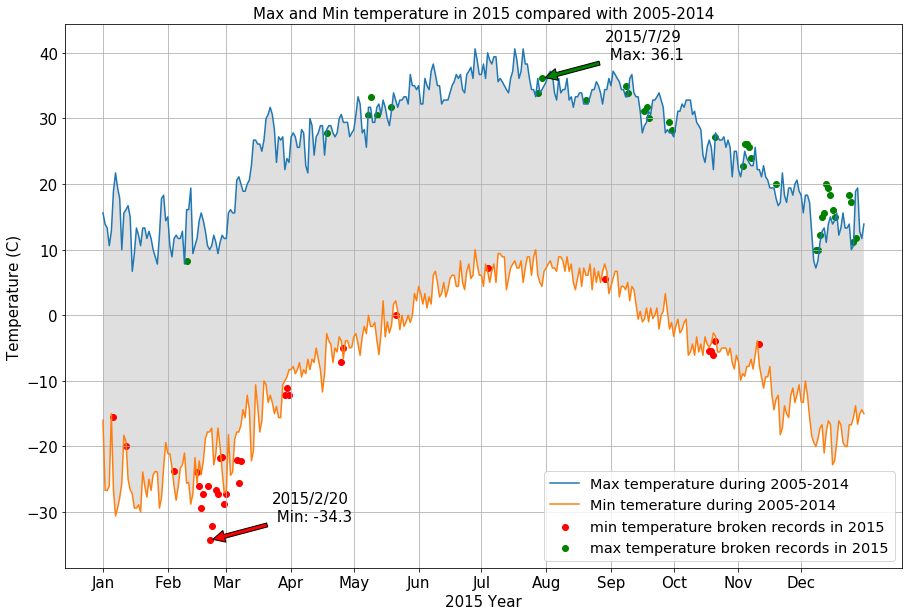

In [74]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)

# 作出近十年最大最小图
ax1.plot(list(result.Tmax), '-', label='Max temperature during 2005-2014')
ax1.plot(list(result.Tmin), '-', label='Min temerature during 2005-2014')
ax1.fill_between(range(len(result)), result.Tmin, result.Tmax, facecolor='gray', alpha=0.25)
ax1.grid(True)

# 设置x，y轴坐标
monthdays = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
xticks = np.cumsum(monthdays)
plt.xticks(xticks, months, size=15)
plt.yticks(size=15)
plt.xlabel('2015 Year', size=15)
plt.ylabel('Temperature (C)', size=15)

# 作出2015年突破记录的温度值
minarray = [xticks[i-1]+j for i, j in brokenMinIndex]
maxarray = [xticks[i-1]+j for i, j in brokenMaxIndex]
plt.scatter(minarray, result.loc[brokenMinIndex, '2015min'].values, c='r', label='min temperature broken records in 2015')
plt.scatter(maxarray, result.loc[brokenMaxIndex, '2015max'].values, c='g', label='max temperature broken records in 2015')

# 设置双坐标轴
# ax2 = ax1.twinx()

# 设置标注
plt.annotate('2015/2/20\n Min: -34.3', xy=(xticks[idmin[0]-1]+idmin[1], result.loc[idmin, '2015min']), 
                 xytext=(xticks[idmin[0]-1]+idmin[1]+30, result.loc[idmin, '2015min']+3),
                 arrowprops=dict(facecolor='red', shrink=0.05), size=15)
plt.annotate('2015/7/29\n Max: 36.1', xy=(xticks[idmax[0]-1]+idmax[1], result.loc[idmax, '2015max']), 
                 xytext=(xticks[idmax[0]-1]+idmax[1]+30, result.loc[idmax, '2015max']+3),
                 arrowprops=dict(facecolor='green', shrink=0.05), size=15)

# 设置图例
ax1.legend(loc='best', fontsize='x-large')

# 设置标题
plt.title('Max and Min temperature in 2015 compared with 2005-2014', size=15)
plt.savefig('Assignment2.jpg')
plt.show()